<a href="https://colab.research.google.com/github/Reenook/Python-AI-Projects/blob/main/Multi_Label_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset link: https://github.com/conversationai/unhealthy-conversations/tree/main/corpus

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [2]:
!pip install transformers

In [4]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 47.9 MB/s eta 0:00:00


In [33]:
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [34]:
train_path = '/content/drive/MyDrive/ucc/train.csv'
val_path = '/content/drive/MyDrive/ucc/val.csv'

In [35]:
train_data = pd.read_csv(train_path)

# **Inspecting Dataset**

In [38]:
train_data.head()

,_unit_id,_trusted_judgments,comment,antagonize,antagonize:confidence,condescending,condescending:confidence,dismissive,dismissive:confidence,generalisation,generalisation:confidence,generalisation_unfair,generalisation_unfair:confidence,healthy,healthy:confidence,hostile,hostile:confidence,sarcastic,sarcastic:confidence
0,2319157561,4,"Three marriages, several bankrupt periods, inh...",0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,0.7578,0,0.7565,0,1.0000
1,1739464982,4,The sense of entitlement among high school 'jo...,0,0.7634,0,0.7634,0,0.7634,0,1.0000,0.0,1.0,1,0.7634,0,0.7634,0,0.7634
2,1739457583,5,So what? He was just stating the obvious.,0,0.8121,0,0.5928,0,0.8043,0,1.0000,0.0,1.0,1,0.6163,0,1.0000,0,1.0000
3,2319156950,40,"If one is a Con, why yes, one would honk. Loud...",0,0.8508,0,0.8867,0,0.9239,0,0.8863,0.0,1.0,1,0.8508,0,0.9641,0,0.8868
4,2327196492,3,Ooohhh... It's Wendy Whiner... making sure to ...,0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,1.0000,0,1.0000,0,1.0000


In [39]:
train_data.shape

(35503, 19)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35503 entries, 0 to 35502
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   _unit_id                          35503 non-null  int64  
 1   _trusted_judgments                35503 non-null  int64  
 2   comment                           35502 non-null  object 
 3   antagonize                        35503 non-null  int64  
 4   antagonize:confidence             35503 non-null  float64
 5   condescending                     35503 non-null  int64  
 6   condescending:confidence          35503 non-null  float64
 7   dismissive                        35503 non-null  int64  
 8   dismissive:confidence             35503 non-null  float64
 9   generalisation                    35503 non-null  int64  
 10  generalisation:confidence         35503 non-null  float64
 11  generalisation_unfair             35503 non-null  float64
 12  gene

In [41]:
train_data.describe()

,_unit_id,_trusted_judgments,antagonize,antagonize:confidence,condescending,condescending:confidence,dismissive,dismissive:confidence,generalisation,generalisation:confidence,generalisation_unfair,generalisation_unfair:confidence,healthy,healthy:confidence,hostile,hostile:confidence,sarcastic,sarcastic:confidence
count,3.550300e+04,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000,35503.000000
mean,1.900787e+09,4.635467,0.047573,0.935671,0.054277,0.929935,0.030166,0.939790,0.021181,0.960473,0.020026,0.978715,0.925218,0.888247,0.025998,0.950006,0.042278,0.933269
std,2.532064e+08,8.987495,0.212865,0.126049,0.226567,0.129269,0.171048,0.120491,0.143990,0.100016,0.140093,0.128954,0.263044,0.153593,0.159131,0.110633,0.201226,0.125645
min,1.739440e+09,3.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500100,0.000000,0.000000,0.000000,0.500300,0.000000,0.500300,0.000000,0.500800
25%,1.739452e+09,3.000000,0.000000,1.000000,0.000000,0.844500,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.790600,0.000000,1.000000,0.000000,1.000000
50%,1.739464e+09,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.254075e+09,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2.327215e+09,167.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

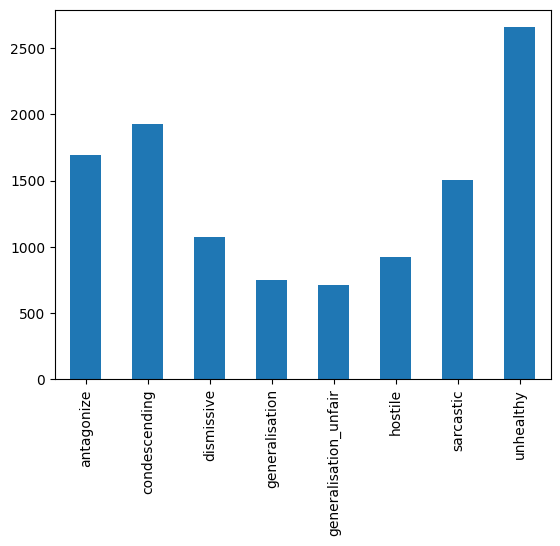

In [42]:
train_data['unhealthy'] = np.where(train_data['healthy'] == 1, 0, 1)

attributes = ['antagonize', 'condescending','dismissive','generalisation',
              'generalisation_unfair','hostile','sarcastic','unhealthy']

train_data[attributes].sum().plot.bar()

In [43]:
from torch.utils.data import Dataset

In [44]:
class UCC_Dataset(Dataset):

  def __init__(self, data_path, tokenizer, attributes, max_token_len: int = 128, sample = 5000):
    self.data_path = data_path
    self.tokenizer = tokenizer
    self.attributes = attributes
    self.max_token_len = max_token_len
    self.sample = sample
    self._prepare_data()


  def _prepare_data(self):
    data = pd.read_csv(self.data_path)
    data['unhealthy'] = np.where(data['healthy'] == 1, 0, 1)
    if self.sample is not None:
      unhealthy = data.loc[data[attributes].sum(axis=1) > 0]
      clean = data.loc[data[attributes].sum(axis=1) == 0]
      self.data = pd.concat([unhealthy, clean.sample(self.sample, random_state=7)])
    else:
      self.data = data

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    item = self.data.iloc[index]
    comment = str(item.comment)
    attributes = torch.FloatTensor(item[self.attributes])
    tokens = self.tokenizer.encode_plus(comment,
                                        add_special_tokens=True,
                                        return_tensors='pt',
                                        truncation=True,
                                        padding='max_length',
                                        max_length=self.max_token_len,
                                        return_attention_mask = True)
    return {'input_ids': tokens.input_ids.flatten(), 'attention_mask': tokens.attention_mask.flatten(), 'labels': attributes}


In [45]:
import torch
from transformers import AutoTokenizer
model_name = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
ucc_ds = UCC_Dataset(train_path, tokenizer, attributes=attributes)
ucc_ds_val = UCC_Dataset(val_path, tokenizer, attributes=attributes, sample=None)

In [46]:
ucc_ds.__getitem__(0)['labels'].shape, ucc_ds.__getitem__(0)['input_ids'].shape, ucc_ds.__getitem__(0)['attention_mask'].shape

(torch.Size([8]), torch.Size([128]), torch.Size([128]))

In [47]:
len(ucc_ds)

9960

In [48]:
len(ucc_ds_val)

4427

# **Data Module**

In [49]:
import pytorch_lightning as pl
from torch.utils.data import DataLoader

In [50]:
class UCC_Data_Module(pl.LightningDataModule):

  def __init__(self, train_path, val_path, attributes, batch_size: int = 16, max_token_length: int = 128,  model_name='roberta-base'):
    super().__init__()
    self.train_path = train_path
    self.val_path = val_path
    self.attributes = attributes
    self.batch_size = batch_size
    self.max_token_length = max_token_length
    self.model_name = model_name
    self.tokenizer = AutoTokenizer.from_pretrained(model_name)

  def setup(self, stage = None):
    if stage in (None, "fit"):
      self.train_dataset = UCC_Dataset(self.train_path, attributes=self.attributes, tokenizer=self.tokenizer)
      self.val_dataset = UCC_Dataset(self.val_path, attributes=self.attributes, tokenizer=self.tokenizer, sample=None)
    if stage == 'predict':
      self.val_dataset = UCC_Dataset(self.val_path, attributes=self.attributes, tokenizer=self.tokenizer, sample=None)

  def train_dataloader(self):
    return DataLoader(self.train_dataset, batch_size = self.batch_size, num_workers=4, shuffle=True)

  def val_dataloader(self):
    return DataLoader(self.val_dataset, batch_size = self.batch_size, num_workers=4, shuffle=False)

  def predict_dataloader(self):
    return DataLoader(self.val_dataset, batch_size = self.batch_size, num_workers=4, shuffle=False)


In [51]:
ucc_data_module = UCC_Data_Module(train_path, val_path, attributes=attributes)

In [52]:
ucc_data_module.setup()

In [53]:
ucc_data_module.train_dataloader()

In [54]:
len(ucc_data_module.train_dataloader())

623

# **Model Training**

In [59]:
from transformers import AutoModel, get_cosine_schedule_with_warmup
from torch.optim import AdamW
import torch.nn as nn
import math
from torchmetrics.functional.classification import auroc
import torch.nn.functional as F


In [60]:
class UCC_Comment_Classifier(pl.LightningModule):

  def __init__(self, config: dict):
    super().__init__()
    self.config = config
    self.pretrained_model = AutoModel.from_pretrained(config['model_name'], return_dict = True)
    self.hidden = torch.nn.Linear(self.pretrained_model.config.hidden_size, self.pretrained_model.config.hidden_size)
    self.classifier = torch.nn.Linear(self.pretrained_model.config.hidden_size, self.config['n_labels'])
    torch.nn.init.xavier_uniform_(self.classifier.weight)
    self.loss_func = nn.BCEWithLogitsLoss(reduction='mean')
    self.dropout = nn.Dropout()

  def forward(self, input_ids, attention_mask, labels=None):
    # roberta layer
    output = self.pretrained_model(input_ids=input_ids, attention_mask=attention_mask)
    pooled_output = torch.mean(output.last_hidden_state, 1)
    # final logits
    pooled_output = self.dropout(pooled_output)
    pooled_output = self.hidden(pooled_output)
    pooled_output = F.relu(pooled_output)
    pooled_output = self.dropout(pooled_output)
    logits = self.classifier(pooled_output)
    # calculate loss
    loss = 0
    if labels is not None:
      loss = self.loss_func(logits.view(-1, self.config['n_labels']), labels.view(-1, self.config['n_labels']))
    return loss, logits

  def training_step(self, batch, batch_index):
    loss, outputs = self(**batch)
    self.log("train loss ", loss, prog_bar = True, logger=True)
    return {"loss":loss, "predictions":outputs, "labels": batch["labels"]}

  def validation_step(self, batch, batch_index):
    loss, outputs = self(**batch)
    self.log("validation loss ", loss, prog_bar = True, logger=True)
    return {"val_loss": loss, "predictions":outputs, "labels": batch["labels"]}

  def predict_step(self, batch, batch_index):
    loss, outputs = self(**batch)
    return outputs

  def configure_optimizers(self):
    optimizer = AdamW(self.parameters(), lr=self.config['lr'], weight_decay=self.config['weight_decay'])
    total_steps = self.config['train_size']/self.config['batch_size']
    warmup_steps = math.floor(total_steps * self.config['warmup'])
    warmup_steps = math.floor(total_steps * self.config['warmup'])
    scheduler = get_cosine_schedule_with_warmup(optimizer, warmup_steps, total_steps)
    return [optimizer],[scheduler]




In [61]:
config = {
    'model_name': 'distilroberta-base',
    'n_labels': len(attributes),
    'batch_size': 128,
    'lr': 1.5e-6,
    'warmup': 0.2,
    'train_size': len(ucc_data_module.train_dataloader()),
    'weight_decay': 0.001,
    'n_epochs': 100
}

model = UCC_Comment_Classifier(config)

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [62]:
idx=0
input_ids = ucc_ds.__getitem__(idx)['input_ids']
attention_mask = ucc_ds.__getitem__(idx)['attention_mask']
labels = ucc_ds.__getitem__(idx)['labels']
model.cpu()
loss, output = model(input_ids.unsqueeze(dim=0), attention_mask.unsqueeze(dim=0), labels.unsqueeze(dim=0))
print(labels.shape, output.shape, output)

torch.Size([8]) torch.Size([1, 8]) tensor([[ 5.4633e-01, -1.1330e+00,  1.8896e+00, -2.0335e-01, -8.8914e-01,
         -4.0261e-01,  1.5407e-03, -1.1575e-01]], grad_fn=<AddmmBackward0>)


In [ ]:
# datamodule
ucc_data_module = UCC_Data_Module(train_path, val_path, attributes=attributes, batch_size=config['batch_size'])
ucc_data_module.setup()

# model
model = UCC_Comment_Classifier(config)

# trainer and fit
trainer = pl.Trainer(max_epochs=config['n_epochs'], num_sanity_val_steps=50)
trainer.fit(model, ucc_data_module)


# **Predictions**

In [66]:
# method to convert list of comments into predictions for each comment
def classify_raw_comments(model, dm):
  predictions = trainer.predict(model, datamodule=dm)
  flattened_predictions = np.stack([torch.sigmoid(torch.Tensor(p)) for batch in predictions for p in batch])
  return flattened_predictions

In [ ]:
predictions = classify_raw_comments(model, ucc_data_module)

In [ ]:
val_data = pd.read_csv(val_path)
val_data['unhealthy'] = np.where(val_data['healthy'] == 1, 0, 1)
true_labels = np.array(val_data[attributes])

In [ ]:
from sklearn import metrics
plt.figure(figsize=(15, 8))
for i, attribute in enumerate(attributes):
  fpr, tpr, _ = metrics.roc_curve(
      true_labels[:,i].astype(int), predictions[:, i])
  auc = metrics.roc_auc_score(
      true_labels[:,i].astype(int), predictions[:, i])
  plt.plot(fpr, tpr, label='%s %g' % (attribute, auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('RoBERTa Trained on UCC Datatset - AUC ROC')